# Generalized Method of Moments (GMM) Estimation

본 포스트는 Rice University의 Richard W. Evans가 2018년 7월 QuantEcon에 게시한 [Generalized Method of Moments (GMM) Estimation](https://notes.quantecon.org/submission/5b3b1856b9eab00015b89f90)을 기본적으로 번역하되, 필요에 따라 일부 내용을 수정하거나 추가적인 내용들을 덧붙이면서 만들어졌습니다.

<br>

## 1. Introduction: MLE vs. GMM

Maximum likelihood (ML) estimator와 GMM estimator의 정확도와 효율성에 대한 비교는 다양한 컨텍스트에서 이뤄져 왔습니다. 일례로 Fuhrer et al. (1995)은 모델이 단순하고 샘플 수가 적을 때 MLE가 가지는 강점들을 인벤토리 모델 컨텍스트에서 보여주었는데, 오늘 여기 서론에서는 좀더 일반적인 관점에서 두 추정법의 강점과 약점을 비교하고자 합니다.

1.1. MLE 강점

* ML 추정치는 더 높은 통계적 유의성을 가지곤 합니다. GMM과 비교했을 때 MLE가 분포에 관한 훨씬 강한 가정을 사용하기 때문입니다.
* ML 추정치는 파라미터나 모델 표준화에 대해 덜 민감합니다.
* ML 추정치는 샘플 수가 적은 상황에서 보통 편향이 더 작고 더 효율적입니다.


1.2. MLE 약점

* MLE는 분포에 관한 강한 가정을 필요로 합니다. MLE를 위해서는 DGP(data generating process)가 완전하게 명시되어야 하는데, 이 과정에서 쓰이는 가정들이 현실과는 다른 경우가 거의 대부분이겠습니다.
* MLE는 rational expectations 모델에 적합하지 않습니다. 일관적인 belief를 고려할 때 likelihood function에 비선형성이 발생하면서 global optimum을 찾기 어려워지기 때문입니다.
* 연장선 상에서 MLE는 비선형 모델에 적합하지 않습니다. 심지어 선형 모델일지라도 데이터가 불규칙적인 경우에는 likelihood function이 비선형성을 띄기 쉬운데, 모델 자체가 복잡하고 비선형적이라면 추정의 어려움이 배가 되겠습니다.


1.3. GMM 강점

* GMM은 아주 유연한 identification을 가능하게 합니다. (후술하겠지만) moment들의 개수가 추정하려는 파라미터들의 개수보다 많고, 또 moment들이 서로 독립이기만 하면 어떤 종류의 moment들이든 GMM 추정치를 identify할 수 있습니다 (이때 파라미터들도 각각 identify되기 위해서 서로 독립이긴 해야겠습니다).
* GMM은 샘플 수가 많을 때 아주 유리합니다. GMM estimator는 아주 consistent하고 asymptotically normal한 특성을 가집니다.
* GMM은 DGP에 대한 최소한의 가정만을 필요로 합니다. In GMM, you need not specify the distributions of the error terms in your model of the DGP. This is often a strength, given that most error are not observed and most models are gross approximations of the true DGP.


1.4. GMM 약점

* GMM 추정치는 일반적으로 ML 추정치에 비해서 통계적으로 덜 유의할 가능성이 큽니다. 역시 분포에 대한 최소한의 가정만 활용하기 때문이고요.
* GMM 추정치는 파라미터나 모델 표준화에 있어서 더 민감합니다.
* GMM은 샘플 수가 적을 때 편향이 크고 비효율적이기 때문에 불리합니다.

요약해서 MLE와 GMM 중 어떤 추정을 실시할지 고민할 때는 아래 질문들에 대해 먼저 대답해야 합니다.

- How much data is available for the estimation? Large data samples will make GMM relatively more attractive than MLE because of the nice large sample properties of GMM and fewer required assumptions on the model
- How complex is the model? Linear models or quadratic models are much easier to do using MLE than are more highly nonlinear models. Rational expectations models (macroeconomics) create an even more difficult level of nonlinearity that pushes you toward GMM estimation.
- How comfortable are you making strong distributional assumptions? MLE requires a complete specification of all distributional assumptions of the model DGP. If you think these assumptions are too strong, you should use GMM.

<br>

## 2. GMM

GMM was first formalized by Hansen (1982). A strength of GMM estimation is that the econometrician can remain completely agnostic as to the distribution of the random variables in the DGP. For identification, the econometrician simply needs at least as many moment conditions from the data as he has parameters to estimate.

A moment of the data is broadly defined as any statistic that summarizes the data to some degree. A data moment could be as narrow as an individual observation from the data or as broad as the sample average. GMM estimates the parameters of a model or data generating process to make the model moments as close as possible to the corresponding data moments. See Davidson and MacKinnon (2004, ch. 9) for a more detailed treatment of GMM. The estimation methods of linear least squares, nonlinear least squares, generalized least squares, and instrumental variables estimation are all specific cases of the more general GMM estimation method.

Let $m(x)$ be an $R \times 1$ vector of moments from the real world data $x$. And let $x$ be an $N \times K$ matrix of data with $K$ columns representing $K$ variables and $N$ observations. Let the model DGP be characterized as $F(x,\theta)$, where $F$ is a vector of equations, each of which is a function of the data $x$ and the $K \times 1$ parameter vector $\theta$. Then define $m(x|\theta)$ as a vector of $R$ moments from the model that correspond to the real-world moment vector $m(x)$. Note that GMM requires both real world data $x$ and deterministic moments from the model $m(x|\theta)$ in order to estimate $\hat\theta_{GMM}$. There is also a stochastic way to generate moments from the model, which we discuss later in our section on Simulated Method of Moments (SMM).

The GMM approach of estimating the parameter vector $\hat\theta_{GMM}$ is to choose $\theta$ to minimize some distance measure of the data moments $m(x)$ from the model moments $m(x|\theta)$.

\begin{equation}
    \hat\theta_{GMM} := \arg\min_{\theta}{|| m(x|\theta) - m(x) ||}
\end{equation}

The distance measure $||m(x|\theta)−m(x)||$ can be any kind of norm. But it is important to recognize that your estimates $\hat\theta_{GMM}$ will be dependent on what distance measure (norm) you choose. The most widely studied and used distance metric in GMM estimation is the $L^2$ norm or the sum of squared errors in moments. Define the moment error function $e(x|\theta)$ as the percent difference in the vector of model moments from the data moments.

\begin{equation}
    e(x) = \frac{m(x|\theta)-m(x)}{m(x)}
\end{equation}

It is important that the error function $e(x|\theta)$ be a percent deviation of the moments (given that none of the data moments are 0). This puts all the moments in the same units, which helps make sure that no moments receive unintended weighting simply due to its units. This ensures that the problem is scaled properly and does not suffer from ill conditioning.

In this case, the GMM estimator is the following,

\begin{equation}
    \hat\theta_{GMM} := \arg\min_{\theta}{e(x|\theta)^T W e(x|\theta)}
\end{equation}

where $W$ is a $R \times R$ weighting matrix in the criterion function. For now, think of this weighting matrix as the identity matrix. But we will show in the following section a more optimal weighting matrix. We call the quadratic form expression $e(x|\theta)^T W e(x|\theta)$ the <i>criterion function</i> because it is a strictly positive scalar that is the object of the minimization in the GMM problem statement.

The $R \times R$ weighting matrix $W$ in the criterion function allows the econometrician to control how each moment is weighted in the minimization problem. For example, an $R \times R$ identity matrix for $W$ would give each moment equal weighting, and the criterion function would be a simply sum of squared percent deviations (errors). Other weighting strategies can be dictated by the nature of the problem or model.

<br>

## 3. Example

MLE 포스팅과 동일한 학생 성적 데이터를 사용해서 간단한 GMM 추정 실습을 진행해 보겠습니다. 우선 실습에 필요한 라이브러리와 데이터를 불러옵니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.integrate as intgr
import scipy.optimize as opt

data = pd.read_csv("https://raw.githubusercontent.com/rickecon/Notebooks/master/MLE/data/Econ381totpts.txt",
                   header=None, names=["points"])
data

,points
0,275.50
1,351.50
2,346.25
3,228.25
4,108.25
...,...
156,235.00
157,102.20
158,112.30
159,130.60


In [2]:
# PDF 생성 함수
def norm_pdf(xvals, mu, sigma):
    pdf_vals = 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(- (xvals-mu)**2 / (2*sigma**2))
    return pdf_vals

In [3]:
# 두 종류의 데이터 moment: mean(data), variance(data)
def data_moments(xvals):
    mean_data = xvals.mean()
    var_data = xvals.var()
    return mean_data, var_data

# 두 종류의 모델 moment: mean(model), variance(model)
def model_moments(mu, sigma):
    xfx = lambda x: x * norm_pdf(x, mu, sigma)
    (mean_model, m_m_err) = intgr.quad(xfx, -np.inf, np.inf)
    
    x2fx = lambda x: ((x - mean_model) ** 2) * norm_pdf(x, mu, sigma)
    (var_model, v_m_err) = intgr.quad(x2fx, -np.inf, np.inf)
    
    return mean_model, var_model

In [4]:
# computes the vector of moment errors (in percent deviation from the data moment vector) for GMM
def err_vec(xvals, mu, sigma, simple):
    mean_data, var_data = data_moments(xvals)
    moms_data = np.array([[mean_data], [var_data]])
    
    mean_model, var_model = model_moments(mu, sigma)
    moms_model = np.array([[mean_model], [var_model]])
    
    if simple:
        err_vec = moms_model - moms_data
    # 퍼센트로
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec

In [5]:
# computes the weighted sum of squared moment errors criterion function value
def criterion(params, *args):
    mu, sigma = params
    xvals, W = args
    
    err = err_vec(xvals, mu, sigma, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

GMM 추정을 위한 함수 정의는 모두 끝났습니다. Optimal weighting matrix가 $W=I$인 경우를 시작으로 GMM 추정을 시행해 보겠습니다.

In [6]:
mu_init, sig_init = 400, 60
params_init = np.array([mu_init, sig_init])

W_hat = np.eye(2)
gmm_args = (data.points, W_hat)

gmm_results = opt.minimize(criterion, params_init, args=(gmm_args),
                           method="L-BFGS-B", bounds=((1e-10, None), (1e-10, None)))
gmm_results

      fun: array([[7.64927056e-09]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.10032833e-07,  3.07938560e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 39
      nit: 10
   status: 0
  success: True
        x: array([341.87888367,  88.75233008])

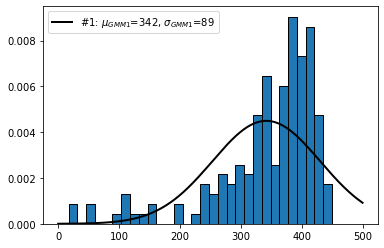

In [8]:
# 실제 관측된 히스토그램
count, bins, ignored = plt.hist(data, bins=30, density=True, edgecolor='k')

# GMM을 통해 추정된 PDF
x_grid = np.linspace(0, 500, 500)
mu_GMM1, sig_GMM1 = gmm_results.x
plt.plot(x_grid, norm_pdf(x_grid, mu_GMM1, sig_GMM1),
         linewidth=2, color='k', label='#1: $\mu_{GMM1}$=342, $\sigma_{GMM1}$=89')
plt.legend()
plt.savefig("./assets/02-GMM/gmm_01.png", dpi=200)

## References

* Fuhrer JC, Moore GR, Schuh SD. (1995). "Estimating the Linear-quadratic Inventory Model: Maximum Likelihood versus Generalized Method of Moments". <i>Journal of Monetary Economics</i> 35(1) 115-157.
* Hansen LP. (1982). "Large Sample Properties of Generalized Method of Moments Estimations". <i>Econometrica</i> 50(4) 1029-1054.

<br>